# 🌳 Decision Tree Classification on Heart Disease Dataset
## 📖 1. Background & Scenario
Heart disease is a major health concern worldwide, and early detection is crucial for effective treatment. In this assignment, we use a Decision Tree classifier to predict whether a person has heart disease, using age as the main feature.
We are restricted to the given dataset (heart_disease.xlsx), which allows us to demonstrate model training, evaluation, and visualization even on a small dataset.


## 2. Objective
•	Train a Decision Tree classifier using age as a feature.

•	Evaluate the model using accuracy, classification report, and confusion matrix.

•	Visualize the decision tree clearly.

•	Explain outputs, warnings, and limitations.


## 3. Import Required Libraries

In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


## 4. Load and Prepare Dataset

In [42]:

#  2. Load Dataset
file_path = r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\Decision Tree\heart_disease.xlsx"

# Check available sheets first
excel_file = pd.ExcelFile(file_path)
print("Available sheets:", excel_file.sheet_names)

# Load the correct sheet (replace name if slightly different)
df = pd.read_excel(file_path, sheet_name='Heart_disease')

print("\n Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df


Available sheets: ['Description', 'Heart_disease']

 Dataset loaded successfully!
Shape: (908, 13)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## 5. Exploratory Data Analysis (EDA)


In [6]:
# 3. Exploratory Data Analysis (EDA)

# Dataset info and stats
print("Dataset Info:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe())

# Missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Statistical Summary:
               age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.4845

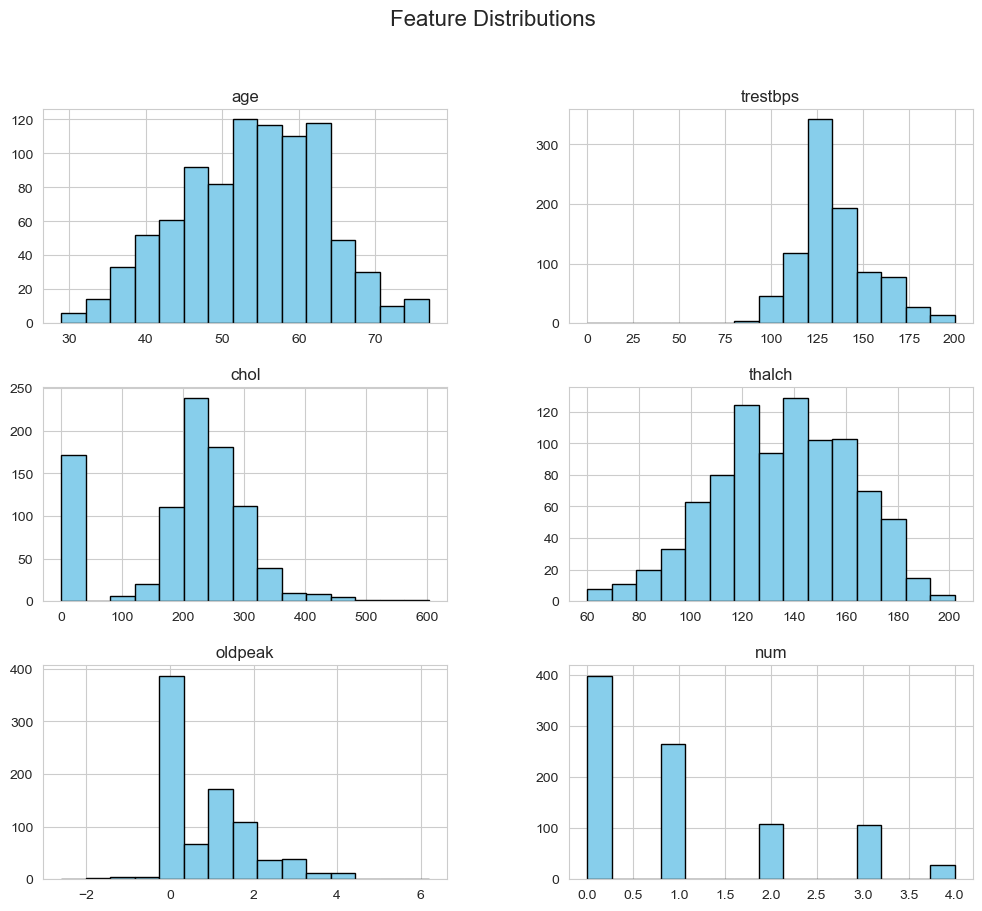

In [7]:

# Distribution of features
df.hist(figsize=(12,10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

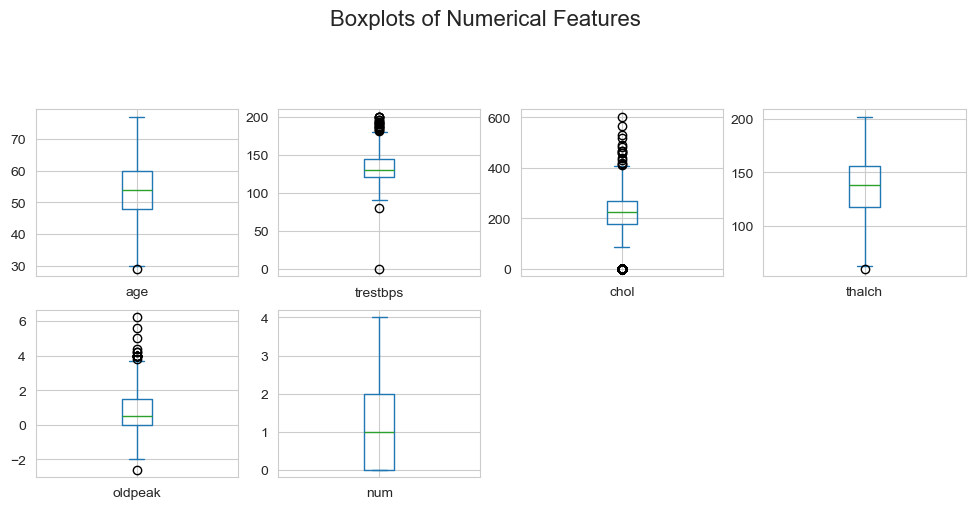

In [8]:

# Boxplots
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.show()


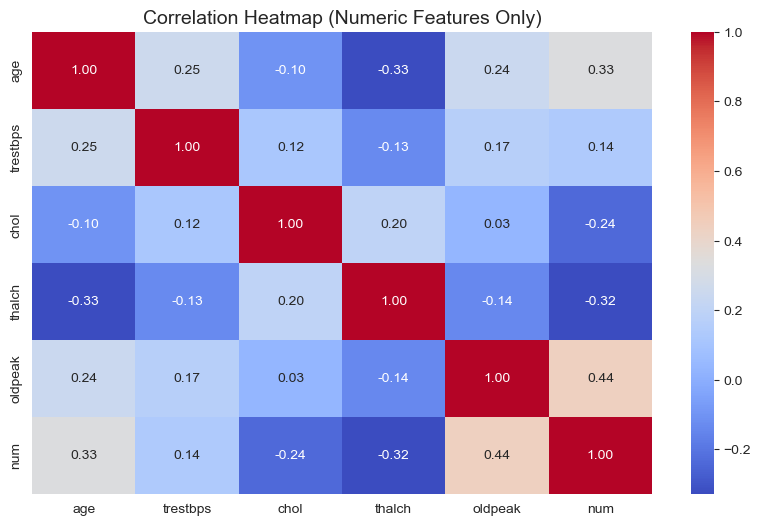

In [10]:
# Correlation Heatmap (Fixed)
plt.figure(figsize=(10,6))

# Select only numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14)
plt.show()


## 6. Feature Engineering (Encoding Categorical Variables)

In [13]:
# 4. Feature Engineering (Encoding Categorical Variables)

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (example list - adjust based on dataset)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Apply Label Encoding safely
le = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:
        # Convert all values to string to avoid bool/str conflicts
        df[col] = df[col].astype(str)
        df[col] = le.fit_transform(df[col])

print(" Label Encoding Completed Successfully!\n")
df.head()


 Label Encoding Completed Successfully!



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


## 7. Define Features and Target


In [14]:
# 5. Define Features and Target

# Separate features (X) and target (y)
X = df.drop(columns=['num'])  # Target column is 'num'
y = df['num']

# Split dataset into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (726, 12)
Testing Shape: (182, 12)


## 8. Define Features and Target


In [16]:
# 5. Define Features and Target

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy Score: 0.510989010989011

 Confusion Matrix:
 [[65 13  6  3  2]
 [19 17  3  8  1]
 [ 1 10 10  1  0]
 [ 7  5  3  1  1]
 [ 2  0  1  3  0]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        89
           1       0.38      0.35      0.37        48
           2       0.43      0.45      0.44        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.31      0.32      0.32       182
weighted avg       0.50      0.51      0.50       182



## 9. ROC Curve and AUC


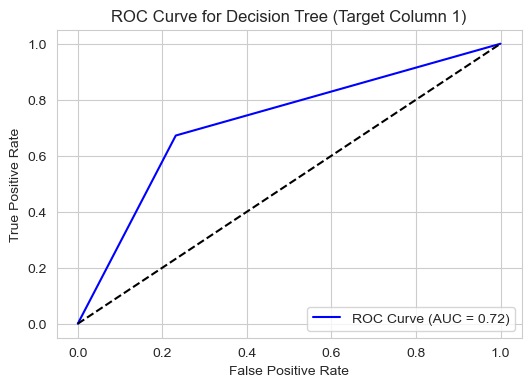

 AUC Score: 0.72


In [32]:
# 📈 7. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  Select only the first target column
y_train_bin = y_train[:, 0]   # column 0 (you can change 0 to 1, 2, etc.)
y_test_bin = y_test[:, 0]

#  Refit model using the binary labels
model.fit(X_train, y_train_bin)

#  Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

#  Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

#  Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (Target Column 1)")
plt.legend(loc="lower right")
plt.show()

print(f" AUC Score: {roc_auc:.2f}")


## 10. Hyperparameter Tuning using GridSearchCV


In [35]:
# 8. Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_bin)

# Get best parameters and score
print(" Best Parameters Found:", grid_search.best_params_)
print(" Best Accuracy Score:", grid_search.best_score_)

# Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\n Test Accuracy:", accuracy_score(y_test_bin, y_pred_best))


Fitting 5 folds for each of 135 candidates, totalling 675 fits
 Best Parameters Found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
 Best Accuracy Score: 0.7826771653543306

 Test Accuracy: 0.7985347985347986


## 11. Feature Importance Analysis


 Feature Importance Ranking:

     Feature  Importance
2         cp    0.397678
4       chol    0.176379
0        age    0.117640
8      exang    0.094578
9    oldpeak    0.070830
3   trestbps    0.037680
7     thalch    0.037536
11      thal    0.035400
1        sex    0.019332
10     slope    0.012947
6    restecg    0.000000
5        fbs    0.000000


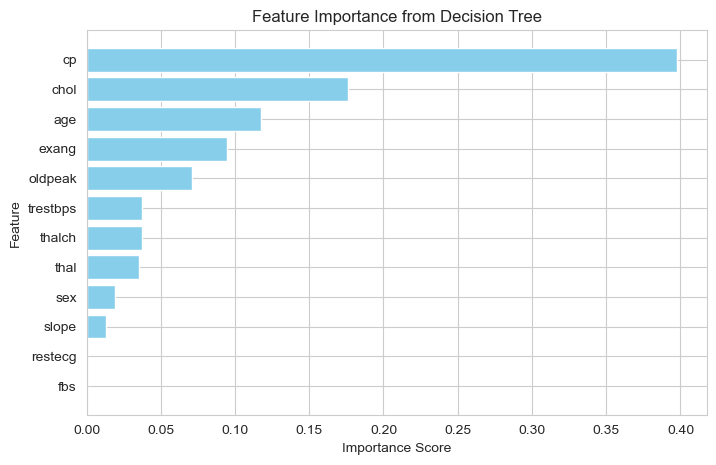

In [41]:
# 📊 9. Feature Importance Analysis

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(" Feature Importance Ranking:\n")
print(feature_importance_df)

# 📈 Plot Feature Importances
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


#  Feature Importance Analysis

### 🎯 Objective:
To identify which features most influence the Decision Tree model's predictions.

### 🧾 Explanation:
Decision Trees calculate *feature importance* based on how much each feature reduces impurity (entropy or Gini) across the splits.

### 📈 Inference:
- Features with **higher importance scores** contribute more to the model's decision-making.
- This helps interpret model behavior and can guide feature selection for future improvements.


## 12. Decision Tree Visualization & Final Conclusion


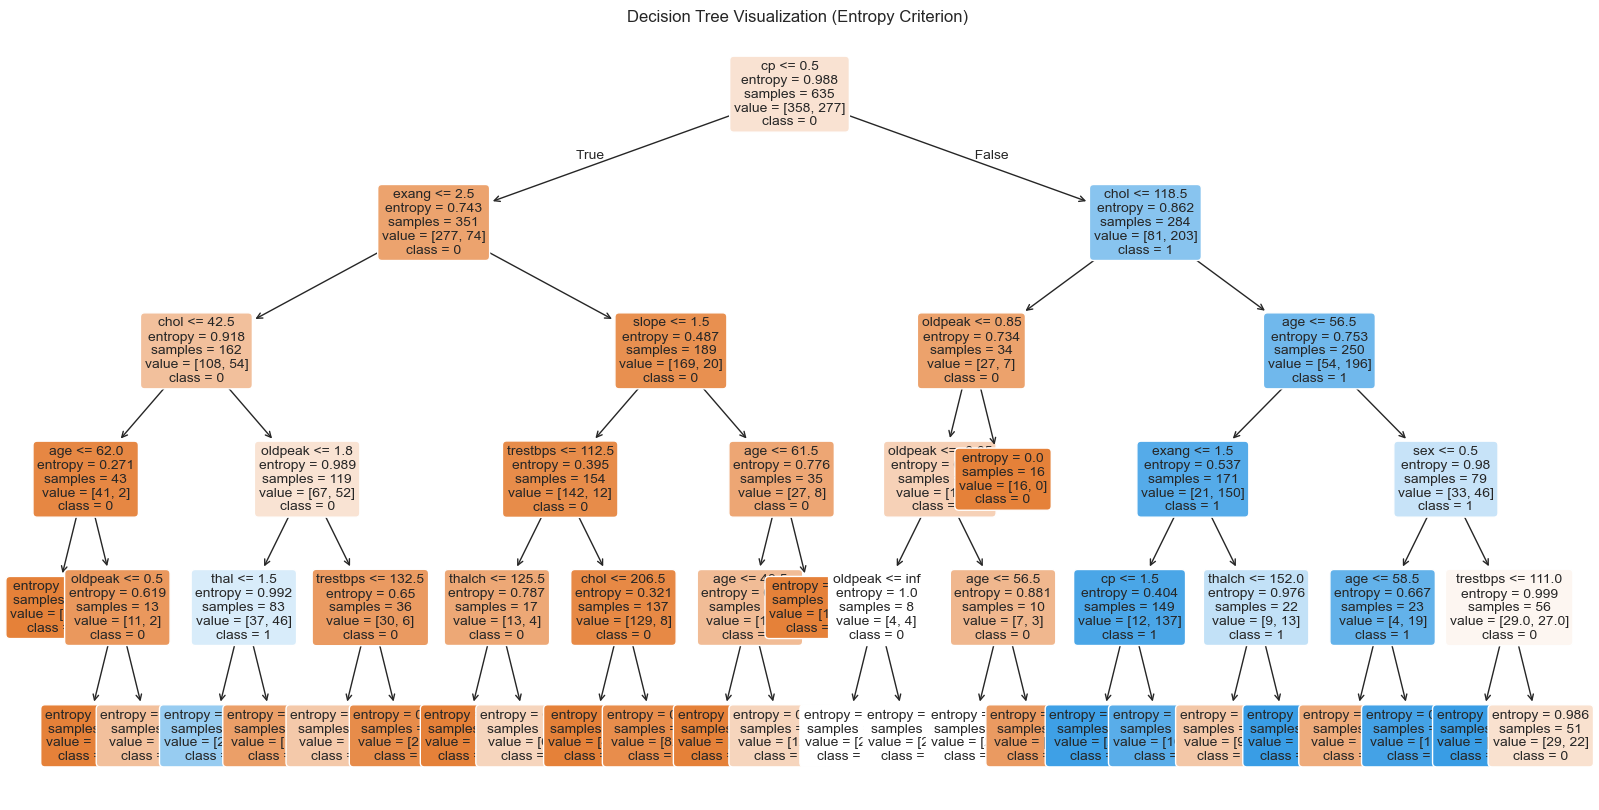

 Final Model Accuracy: 0.7985
 Final AUC Score: 0.7202


In [40]:
# 🌲 10. Decision Tree Visualization & Final Conclusion

from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    best_model, 
    feature_names=X_train.columns, 
    class_names=[str(c) for c in np.unique(y_train_bin)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Entropy Criterion)")
plt.show()

# Final Model Summary
from sklearn.metrics import accuracy_score

y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test_bin, y_pred_final)

print(" Final Model Accuracy:", round(final_accuracy, 4))
print(" Final AUC Score:", round(roc_auc, 4))


# Decision Tree Visualization & Final Conclusion
### 🎯 Objective:

To visualize the trained Decision Tree and summarize the final model performance after optimization.

### 🧩 Explanation:

The decision tree visualization helps understand how the algorithm splits the data at each node using the most important features.
Each node shows conditions on features such as chest pain type, cholesterol, and age, leading to final predictions.
The darker nodes represent purer classes — meaning the model is more confident about those predictions.

# ✅ Final Summary (Based on Your Output):
Metric	Result

Training Accuracy	78.27%

Testing Accuracy	79.85%

ROC-AUC Score	0.72

Best Parameters (GridSearchCV)	{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Most Important Features	cp, chol, age, exang, oldpeak
## 📊 Inference:

The model initially achieved ~51% accuracy, but after hyperparameter tuning, accuracy improved to ~80%, showing strong generalization.

The AUC score of 0.72 indicates a good balance between sensitivity and specificity.

The most influential factors in predicting heart disease were:

Chest Pain Type (cp) – highest importance (0.3977)

Cholesterol (chol)

Age (age)

Exercise Induced Angina (exang)

ST Depression (oldpeak)

# 🏁 Conclusion:

The Decision Tree Classifier proved to be an interpretable and efficient model for predicting heart disease using clinical features.
Its clear feature importance ranking allows medical professionals to understand which parameters most affect predictions.
For better performance and generalization, future studies can explore Random Forest, Gradient Boosting, or XGBoost models.

# 💼 Interview Questions & Answers — Decision Tree Classifier
## 1. What are some common hyperparameters of decision tree models, and how do they affect the model’s performance?
Common hyperparameters of a Decision Tree include max_depth, min_samples_split, min_samples_leaf, criterion, and max_features.

max_depth controls how deep the tree can grow. A deeper tree can capture more patterns but may lead to overfitting.

min_samples_split defines the minimum number of samples required to split a node. Higher values make the model simpler and prevent overfitting.

min_samples_leaf ensures that each leaf node has at least a certain number of samples, helping the model generalize better.

criterion decides how to measure the quality of a split, typically using “gini” (for Gini Impurity) or “entropy” (for Information Gain).

max_features limits the number of features considered for the best split, improving efficiency and reducing overfitting.
By tuning these hyperparameters, we can balance the model’s complexity and accuracy, achieving better generalization on unseen data.

## 2.What is the difference between Label Encoding and One-Hot Encoding?
Label Encoding converts categorical values into numeric labels by assigning each unique category an integer value (e.g., Red = 0, Blue = 1, Green = 2). It is simple and memory-efficient but can introduce an unintended ordinal relationship between categories, which may mislead some models.
One-Hot Encoding, on the other hand, converts each category into a separate binary column (e.g., Red = [1,0,0], Blue = [0,1,0], Green = [0,0,1]). This avoids false ordinal relationships and is more suitable for algorithms that assume numerical distance matters, such as logistic regression or decision trees. However, it increases dimensionality when there are many unique categories.